<a href="https://colab.research.google.com/github/bellinday/ML_team_buzz/blob/bell/model1-withapple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy
import os
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader, random_split, WeightedRandomSampler
import torch.optim as optim
from torch.utils.data import Subset
from torchvision.datasets import ImageFolder

torch.cuda.empty_cache()


import os
import shutil
import numpy as np
import matplotlib.pyplot as plt

import scipy
from PIL import Image
from scipy import ndimage

import torch
import torchvision

from torch import utils
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision import datasets, transforms
import torchvision.models as models

import copy
import time

import torch.nn.functional as F

from torchvision import datasets, models, transforms
from torchvision.datasets import ImageFolder

from torch.utils.data import DataLoader,Dataset,ConcatDataset
from torchvision.utils import make_grid


import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from matplotlib.image import imread

import time
from sklearn.model_selection import train_test_split
from tqdm import tqdm

import torch.nn as nn
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torch.optim import Adam
from torch.autograd import Variable
import torchvision
import pathlib

In [ ]:
def image_show(img):
    plt.imshow(img.permute(1, 2, 0)  )
#     image = transform(img)
#     plt.imshow(image.permute(1, 2, 3))

In [ ]:

#train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

!pip install kaggle

from google.colab import files 
files.upload()

#Make a directory named kaggle and copy the kaggle.json file there; and change its permissions
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

#imagenet_data = torchvision.datasets.ImageNet('https://kaggle.com/saroz014/plant-diseases')
#data_loader = torch.utils.data.DataLoader(imagenet_data, batch_size=4, shuffle=True, num_workers=args.nThreads)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle (1).json


In [ ]:
!kaggle datasets download -d manjuphoenix/appledataset

appledataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
file_name = 'appledataset.zip' #the file is your dataset exact name
with ZipFile(file_name, 'r') as zip:
  #zip.printdir()
  print(zip.extractall())
  #zip.close()
  print('Done')

None
Done


In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomGrayscale(),
    transforms.RandomHorizontalFlip(),
    transforms.RandomInvert(),
    transforms.RandomRotation(30),
])

# Uncomment the below line based on where you train the model----------------------------------------
# !mkdir /kaggle/working/Tomato

# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# !cp -r /kaggle/input/plant-diseases/dataset_itr2/dataset_itr2/test/Tomato* /kaggle/working/Tomato
# !cp -r /kaggle/input/plant-diseases/dataset_itr2/dataset_itr2/train/Tomato* /kaggle/working/Tomato

# !rm -rf /kaggle/working/Tomato/Tomato___Leaf_Mold
# !rm -rf /kaggle/working/Tomato/Tomato___Tomato_mosaic_virus 

# Uncomment this for training on kaggle
# data = datasets.ImageFolder('/kaggle/working/Tomato', transform=transform)----------------------------


# This is for training on Local Machine
data = datasets.ImageFolder('/content/Apple', transform=transform)


# Split into train/test sets:
train_len = int(len(data)*0.75)
train_set, test_set = random_split(data, [train_len, len(data) - train_len])

# Extract classes:
train_classes = [train_set.dataset.targets[i] for i in train_set.indices]
# Calculate support:
class_count = Counter(train_classes)
# Calculate class weights:
class_weights = torch.DoubleTensor([len(train_classes)/c for c in pd.Series(class_count).sort_index().values]) 
# Sampler needs the respective class weight supplied for each image in the dataset:
sample_weights = [class_weights[train_set.dataset.targets[i]] for i in train_set.indices]

sampler = WeightedRandomSampler(weights=sample_weights, num_samples=int(len(train_set)*2), replacement=True)

batch_size=32

# Create torch dataloaders:

dataloaders = DataLoader(data, batch_size=batch_size, sampler=sampler, num_workers=min([os.cpu_count(), batch_size if batch_size > 1 else 0, 8]))
print("The total number of images is:", len(dataloaders))

train_loader = DataLoader(train_set, batch_size=batch_size, sampler=sampler, num_workers=min([os.cpu_count(), batch_size if batch_size > 1 else 0, 8]))
print("The number of images in a training set is:", len(train_loader)*batch_size)

val_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=min([os.cpu_count(), batch_size if batch_size > 1 else 0, 8]))
print("The number of images in a test set is:", len(val_loader)*batch_size)
print(dataloaders.dataset)

print(data.classes)
# x, y = next(iter(dataloaders[0]))

The total number of images is: 1234
The number of images in a training set is: 39488
The number of images in a test set is: 6592
Dataset ImageFolder
    Number of datapoints: 26320
    Root location: /content/Apple
    StandardTransform
Transform: Compose(
               ToTensor()
               RandomGrayscale(p=0.1)
               RandomHorizontalFlip(p=0.5)
               RandomInvert(p=0.5)
               RandomRotation(degrees=[-30.0, 30.0], interpolation=nearest, expand=False, fill=0)
           )
['Apple___healthy', 'Apple_scab', 'Black_rot', 'Cedar_apple_rust']


In [ ]:
if torch.cuda.is_available():
    device = "cuda:0"
else:
    device = "cpu"

device = torch.device(device)
#device = torch.device("cuda:0" if torch.cuda.is_available() else "CPU")
print(device)

cuda:0


In [ ]:
batch_size = 64
n_iters = 20000

In [ ]:
#Creating a simple CNN architechture
class SimpleCustomCNN(nn.Module):
  def __init__(self):
    super(SimpleCustomCNN, self).__init__()

    #Defining a sequential model layers
    self.c1 = nn.Sequential(
        nn.Conv2d(in_channels = 3, out_channels = 16, kernel_size=5, padding=0, stride=1),
        nn.LeakyReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.c2 = nn.Sequential(
        nn.Conv2d(in_channels = 16, out_channels = 32, kernel_size=3, padding=0, stride=1),
        nn.LeakyReLU(),
        nn.AvgPool2d(kernel_size=2, stride=2)
    )
    self.fc1 = nn.Linear(in_features = 62*62*32, out_features = 39)

  def forward(self, x):
    output = self.c1(x)
    output = self.c2(output)
    output = output.reshape(output.size(0), -1)
    #or nn.Flatten()
    output = self.fc1(output)
    return output

model = SimpleCustomCNN()

learning_rate = 0.0001
#!pip install torch-summary 
#import torchsummary as summary
#print(summary(model, (3, 256, 256)))

In [ ]:
print(model)

SimpleCustomCNN(
  (c1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): LeakyReLU(negative_slope=0.01)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (c2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): LeakyReLU(negative_slope=0.01)
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (fc1): Linear(in_features=123008, out_features=39, bias=True)
)


In [ ]:
from tqdm import tqdm

def train(model,loss_fn,dataloader,optimizer,epoch):
  print('\nEpoch : %d'%epoch)
  total_loss=0    
  correct=0
  total=0

  model.train()

  for data in tqdm(dataloader):
    
    inputs,labels=data[0].to(device),data[1].to(device)
    
    outputs=model(inputs)
    
    loss=loss_fn(outputs,labels)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    total_loss += loss.item()
    
    _, predicted = outputs.max(1)
    total += labels.size(0)
    correct += predicted.eq(labels).sum().item()
      
  loss=total_loss/len(dataloader)
  accuracy=100.*correct/total
  
  accuracies['train'].append(accuracy)
  losses['train'].append(loss)
  print('Train Loss: %.3f | Accuracy: %.3f'%(loss,accuracy))

In [ ]:
def test(model,loss_fn,dataloader,epoch):
#   model.eval()

  total_loss=0
  correct=0
  total=0

  with torch.no_grad():
    for data in tqdm(dataloader):
      images,labels=data[0].to(device),data[1].to(device)
      
      outputs=model(images)

      loss= loss_fn(outputs,labels)
      total_loss+=loss.item()
      
      _, predicted = outputs.max(1)
      total += labels.size(0)
      correct += predicted.eq(labels).sum().item()
  
  loss=total_loss/len(dataloader)
  accuracy=100.*correct/total

  losses['val'].append(loss)
  accuracies['val'].append(accuracy)

  print('Test Loss: %.3f | Accuracy: %.3f'%(loss,accuracy)) 

In [ ]:
model = model.to(device)
optimizer_ft = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

In [ ]:
losses = {'train':[], 'val':[]}
accuracies = {'train':[], 'val':[]}
epochs=45
for epoch in range(1,epochs+1): 
  train(model,loss_fn,train_loader,optimizer_ft,epoch)
  test(model,loss_fn,val_loader,epoch)


Epoch : 1


100%|██████████| 1234/1234 [03:34<00:00,  5.75it/s]


Train Loss: 1.560 | Accuracy: 25.993


100%|██████████| 206/206 [00:34<00:00,  6.04it/s]


Test Loss: 1.392 | Accuracy: 24.271

Epoch : 2


100%|██████████| 1234/1234 [03:38<00:00,  5.64it/s]


Train Loss: 1.387 | Accuracy: 27.693


100%|██████████| 206/206 [00:34<00:00,  6.00it/s]


Test Loss: 1.383 | Accuracy: 26.687

Epoch : 3


100%|██████████| 1234/1234 [03:37<00:00,  5.67it/s]


Train Loss: 1.380 | Accuracy: 28.658


100%|██████████| 206/206 [00:34<00:00,  5.91it/s]


Test Loss: 1.374 | Accuracy: 42.006

Epoch : 4


100%|██████████| 1234/1234 [03:40<00:00,  5.60it/s]


Train Loss: 1.374 | Accuracy: 30.567


100%|██████████| 206/206 [00:34<00:00,  5.92it/s]


Test Loss: 1.372 | Accuracy: 28.708

Epoch : 5


100%|██████████| 1234/1234 [03:42<00:00,  5.54it/s]


Train Loss: 1.367 | Accuracy: 32.087


100%|██████████| 206/206 [00:34<00:00,  5.89it/s]


Test Loss: 1.359 | Accuracy: 38.252

Epoch : 6


100%|██████████| 1234/1234 [03:40<00:00,  5.60it/s]


Train Loss: 1.354 | Accuracy: 35.760


100%|██████████| 206/206 [00:34<00:00,  5.89it/s]


Test Loss: 1.346 | Accuracy: 36.991

Epoch : 7


100%|██████████| 1234/1234 [03:37<00:00,  5.67it/s]


Train Loss: 1.339 | Accuracy: 38.842


100%|██████████| 206/206 [00:34<00:00,  5.98it/s]


Test Loss: 1.330 | Accuracy: 32.477

Epoch : 8


100%|██████████| 1234/1234 [03:37<00:00,  5.67it/s]


Train Loss: 1.318 | Accuracy: 41.122


100%|██████████| 206/206 [00:34<00:00,  6.03it/s]


Test Loss: 1.300 | Accuracy: 50.653

Epoch : 9


100%|██████████| 1234/1234 [03:35<00:00,  5.72it/s]


Train Loss: 1.292 | Accuracy: 45.099


100%|██████████| 206/206 [00:34<00:00,  6.02it/s]


Test Loss: 1.278 | Accuracy: 43.252

Epoch : 10


100%|██████████| 1234/1234 [03:36<00:00,  5.71it/s]


Train Loss: 1.262 | Accuracy: 47.523


100%|██████████| 206/206 [00:34<00:00,  5.99it/s]


Test Loss: 1.249 | Accuracy: 47.492

Epoch : 11


100%|██████████| 1234/1234 [03:38<00:00,  5.66it/s]


Train Loss: 1.226 | Accuracy: 50.818


100%|██████████| 206/206 [00:34<00:00,  5.94it/s]


Test Loss: 1.208 | Accuracy: 57.660

Epoch : 12


100%|██████████| 1234/1234 [03:37<00:00,  5.67it/s]


Train Loss: 1.189 | Accuracy: 52.627


100%|██████████| 206/206 [00:34<00:00,  6.01it/s]


Test Loss: 1.163 | Accuracy: 54.347

Epoch : 13


100%|██████████| 1234/1234 [03:35<00:00,  5.73it/s]


Train Loss: 1.153 | Accuracy: 54.369


100%|██████████| 206/206 [00:35<00:00,  5.83it/s]


Test Loss: 1.121 | Accuracy: 63.267

Epoch : 14


100%|██████████| 1234/1234 [03:35<00:00,  5.71it/s]


Train Loss: 1.113 | Accuracy: 57.475


100%|██████████| 206/206 [00:34<00:00,  5.99it/s]


Test Loss: 1.078 | Accuracy: 61.292

Epoch : 15


100%|██████████| 1234/1234 [03:35<00:00,  5.72it/s]


Train Loss: 1.070 | Accuracy: 59.772


100%|██████████| 206/206 [00:34<00:00,  6.01it/s]


Test Loss: 1.035 | Accuracy: 63.495

Epoch : 16


100%|██████████| 1234/1234 [03:37<00:00,  5.68it/s]


Train Loss: 1.030 | Accuracy: 61.649


100%|██████████| 206/206 [00:34<00:00,  6.04it/s]


Test Loss: 1.064 | Accuracy: 52.432

Epoch : 17


100%|██████████| 1234/1234 [03:35<00:00,  5.71it/s]


Train Loss: 0.996 | Accuracy: 63.098


100%|██████████| 206/206 [00:34<00:00,  5.97it/s]


Test Loss: 1.000 | Accuracy: 54.878

Epoch : 18


100%|██████████| 1234/1234 [03:36<00:00,  5.70it/s]


Train Loss: 0.960 | Accuracy: 64.438


100%|██████████| 206/206 [00:35<00:00,  5.82it/s]


Test Loss: 0.924 | Accuracy: 65.000

Epoch : 19


100%|██████████| 1234/1234 [03:36<00:00,  5.70it/s]


Train Loss: 0.925 | Accuracy: 65.894


100%|██████████| 206/206 [00:34<00:00,  5.95it/s]


Test Loss: 0.879 | Accuracy: 68.495

Epoch : 20


100%|██████████| 1234/1234 [03:36<00:00,  5.71it/s]


Train Loss: 0.889 | Accuracy: 67.462


100%|██████████| 206/206 [00:34<00:00,  6.04it/s]


Test Loss: 0.893 | Accuracy: 66.550

Epoch : 21


100%|██████████| 1234/1234 [03:37<00:00,  5.66it/s]


Train Loss: 0.850 | Accuracy: 68.495


100%|██████████| 206/206 [00:34<00:00,  5.93it/s]


Test Loss: 0.812 | Accuracy: 70.912

Epoch : 22


100%|██████████| 1234/1234 [03:36<00:00,  5.69it/s]


Train Loss: 0.825 | Accuracy: 68.906


100%|██████████| 206/206 [00:34<00:00,  6.03it/s]


Test Loss: 0.790 | Accuracy: 71.687

Epoch : 23


100%|██████████| 1234/1234 [03:37<00:00,  5.67it/s]


Train Loss: 0.801 | Accuracy: 69.184


100%|██████████| 206/206 [00:34<00:00,  5.97it/s]


Test Loss: 0.870 | Accuracy: 62.766

Epoch : 24


100%|██████████| 1234/1234 [03:38<00:00,  5.66it/s]


Train Loss: 0.780 | Accuracy: 69.982


100%|██████████| 206/206 [00:34<00:00,  5.98it/s]


Test Loss: 0.757 | Accuracy: 71.003

Epoch : 25


100%|██████████| 1234/1234 [03:37<00:00,  5.68it/s]


Train Loss: 0.769 | Accuracy: 69.726


100%|██████████| 206/206 [00:34<00:00,  5.96it/s]


Test Loss: 0.731 | Accuracy: 72.143

Epoch : 26


100%|██████████| 1234/1234 [03:38<00:00,  5.64it/s]


Train Loss: 0.751 | Accuracy: 70.187


100%|██████████| 206/206 [00:34<00:00,  5.94it/s]


Test Loss: 0.728 | Accuracy: 70.122

Epoch : 27


100%|██████████| 1234/1234 [03:38<00:00,  5.65it/s]


Train Loss: 0.743 | Accuracy: 70.590


100%|██████████| 206/206 [00:34<00:00,  5.94it/s]


Test Loss: 0.724 | Accuracy: 71.033

Epoch : 28


100%|██████████| 1234/1234 [03:37<00:00,  5.67it/s]


Train Loss: 0.735 | Accuracy: 70.015


100%|██████████| 206/206 [00:34<00:00,  5.98it/s]


Test Loss: 0.705 | Accuracy: 72.568

Epoch : 29


100%|██████████| 1234/1234 [03:38<00:00,  5.65it/s]


Train Loss: 0.730 | Accuracy: 70.567


100%|██████████| 206/206 [00:34<00:00,  5.95it/s]


Test Loss: 0.695 | Accuracy: 71.763

Epoch : 30


100%|██████████| 1234/1234 [03:38<00:00,  5.64it/s]


Train Loss: 0.708 | Accuracy: 71.543


100%|██████████| 206/206 [00:34<00:00,  6.01it/s]


Test Loss: 0.715 | Accuracy: 70.745

Epoch : 31


100%|██████████| 1234/1234 [03:37<00:00,  5.67it/s]


Train Loss: 0.703 | Accuracy: 71.474


100%|██████████| 206/206 [00:34<00:00,  5.92it/s]


Test Loss: 0.672 | Accuracy: 73.191

Epoch : 32


100%|██████████| 1234/1234 [03:38<00:00,  5.64it/s]


Train Loss: 0.703 | Accuracy: 71.555


100%|██████████| 206/206 [00:34<00:00,  6.01it/s]


Test Loss: 0.722 | Accuracy: 68.237

Epoch : 33


100%|██████████| 1234/1234 [03:38<00:00,  5.66it/s]


Train Loss: 0.686 | Accuracy: 72.449


100%|██████████| 206/206 [00:34<00:00,  5.92it/s]


Test Loss: 0.672 | Accuracy: 72.690

Epoch : 34


100%|██████████| 1234/1234 [03:37<00:00,  5.67it/s]


Train Loss: 0.682 | Accuracy: 72.368


100%|██████████| 206/206 [00:34<00:00,  5.93it/s]


Test Loss: 0.661 | Accuracy: 73.009

Epoch : 35


100%|██████████| 1234/1234 [03:35<00:00,  5.73it/s]


Train Loss: 0.671 | Accuracy: 72.994


100%|██████████| 206/206 [00:34<00:00,  6.01it/s]


Test Loss: 0.677 | Accuracy: 71.869

Epoch : 36


100%|██████████| 1234/1234 [03:35<00:00,  5.73it/s]


Train Loss: 0.666 | Accuracy: 72.758


100%|██████████| 206/206 [00:34<00:00,  5.94it/s]


Test Loss: 0.658 | Accuracy: 72.386

Epoch : 37


100%|██████████| 1234/1234 [03:34<00:00,  5.75it/s]


Train Loss: 0.649 | Accuracy: 73.830


100%|██████████| 206/206 [00:34<00:00,  5.94it/s]


Test Loss: 0.676 | Accuracy: 71.641

Epoch : 38


100%|██████████| 1234/1234 [03:37<00:00,  5.66it/s]


Train Loss: 0.643 | Accuracy: 74.197


100%|██████████| 206/206 [00:34<00:00,  5.93it/s]


Test Loss: 0.657 | Accuracy: 72.933

Epoch : 39


100%|██████████| 1234/1234 [03:37<00:00,  5.68it/s]


Train Loss: 0.633 | Accuracy: 74.628


100%|██████████| 206/206 [00:35<00:00,  5.86it/s]


Test Loss: 0.626 | Accuracy: 72.462

Epoch : 40


100%|██████████| 1234/1234 [03:37<00:00,  5.67it/s]


Train Loss: 0.628 | Accuracy: 74.787


100%|██████████| 206/206 [00:34<00:00,  6.04it/s]


Test Loss: 0.602 | Accuracy: 76.231

Epoch : 41


100%|██████████| 1234/1234 [03:39<00:00,  5.62it/s]


Train Loss: 0.612 | Accuracy: 75.474


100%|██████████| 206/206 [00:34<00:00,  5.90it/s]


Test Loss: 0.651 | Accuracy: 73.891

Epoch : 42


100%|██████████| 1234/1234 [03:37<00:00,  5.66it/s]


Train Loss: 0.603 | Accuracy: 75.881


100%|██████████| 206/206 [00:34<00:00,  5.94it/s]


Test Loss: 0.582 | Accuracy: 75.456

Epoch : 43


100%|██████████| 1234/1234 [03:37<00:00,  5.68it/s]


Train Loss: 0.598 | Accuracy: 76.076


100%|██████████| 206/206 [00:35<00:00,  5.76it/s]


Test Loss: 0.589 | Accuracy: 74.848

Epoch : 44


100%|██████████| 1234/1234 [03:40<00:00,  5.61it/s]


Train Loss: 0.590 | Accuracy: 76.454


100%|██████████| 206/206 [00:34<00:00,  5.93it/s]


Test Loss: 0.571 | Accuracy: 77.796

Epoch : 45


100%|██████████| 1234/1234 [03:40<00:00,  5.60it/s]


Train Loss: 0.581 | Accuracy: 77.199


100%|██████████| 206/206 [00:35<00:00,  5.89it/s]

Test Loss: 0.637 | Accuracy: 73.526


In [ ]:
#Testing Accuracy
correct = 0
total = 0
with torch.no_grad():
    for data in val_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 72 %


In [ ]:
#Testing classification accuracy for individual classes.
classes = ['Apple___healthy', 'Apple_scab', 'Black_rot', 'Cedar_apple_rust']
class_correct = list(0. for i in range(4))
class_total = list(0. for i in range(4))
c = []
with torch.no_grad():
    for data in val_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted==labels).squeeze()
        # print(c)
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
print(c.type())
for i in range(4):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

torch.cuda.BoolTensor
Accuracy of Apple___healthy : 86 %
Accuracy of Apple_scab : 54 %
Accuracy of Black_rot : 53 %
Accuracy of Cedar_apple_rust : 98 %


In [ ]:
avg = 0
for i in range(4):
  temp = (100 * class_correct[i] / class_total[i])
  avg = avg + temp
avg = avg/4
print('Average accuracy = ', avg)

Average accuracy =  73.19444444444446


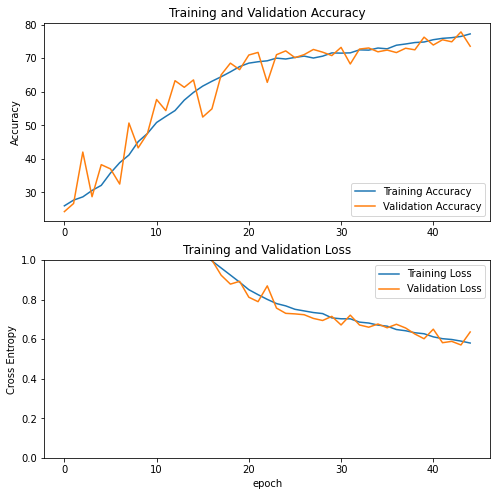

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(accuracies['train'], label='Training Accuracy')
plt.plot(accuracies['val'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
# plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(losses['train'], label='Training Loss')
plt.plot(losses['val'], label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()